In [1]:
!pip install lime


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [3]:
url = 'https://raw.githubusercontent.com/poojithpoosa/dataset/main/train.csv'
# Read the CSV file into a DataFrame
train = pd.read_csv(url)
# Display the DataFrame
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
url = 'https://raw.githubusercontent.com/poojithpoosa/dataset/main/test.csv'
test = pd.read_csv(url)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### EDA of the dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


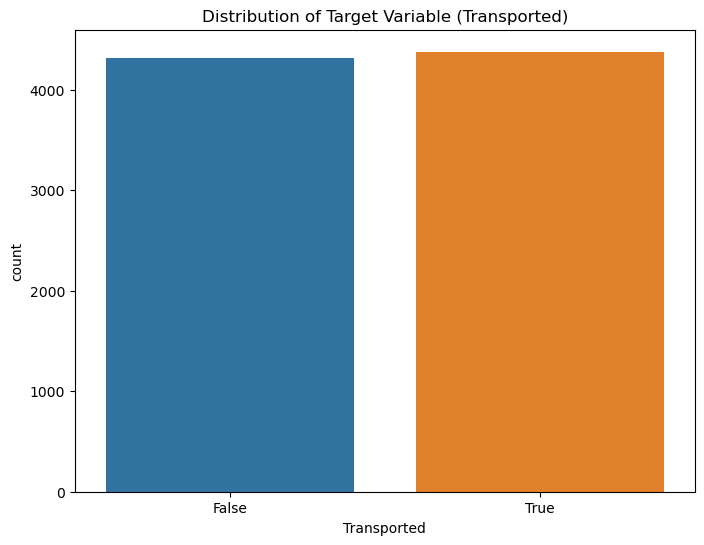

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transported', data=train)
plt.title('Distribution of Target Variable (Transported)')
plt.show()

##### Check for Null values

In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Text(0.5, 1.0, 'Age Distribution By Transported')

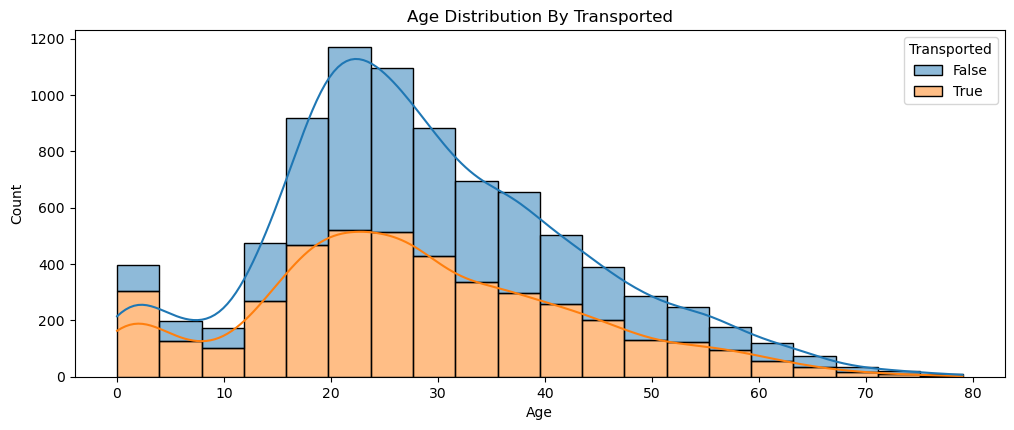

In [8]:
plt.figure(figsize=(12, 4.5))
plot = sns.histplot(data=train, x="Age",hue="Transported",
                    multiple="stack", kde=True, bins=20, label="Age")
plot.set_title("Age Distribution By Transported")

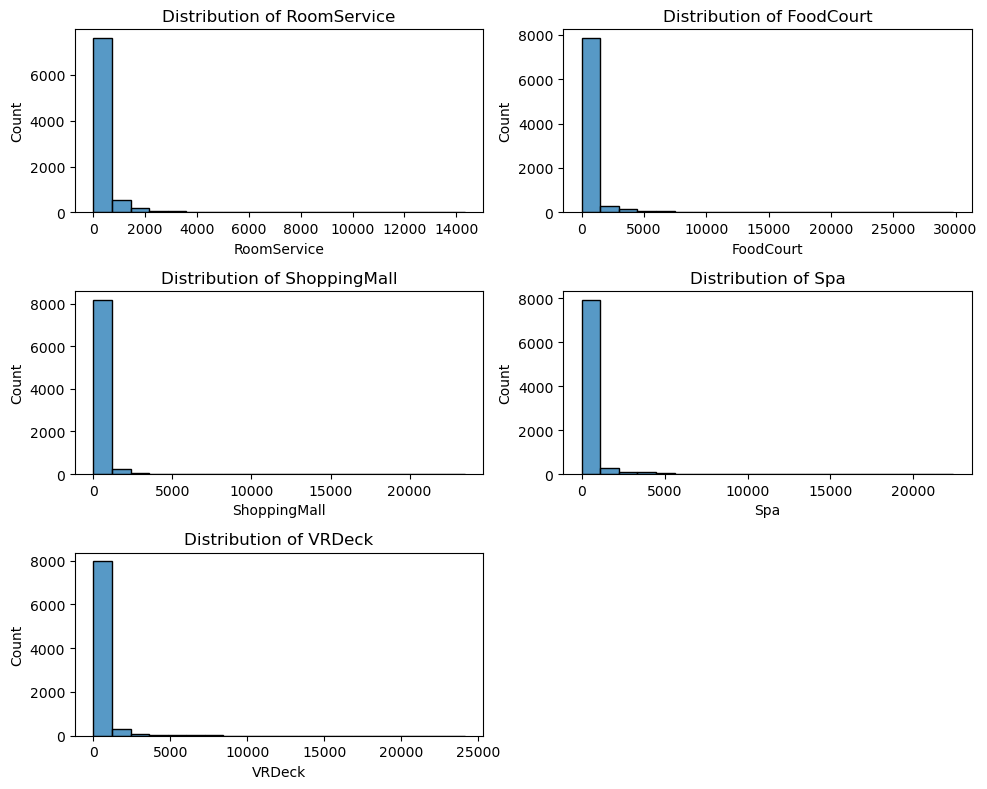

In [9]:
# Initialize the grid
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
fig.delaxes(axes[2, 1])  # remove the empty subplot

# List of variables to plot
numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot each variable
for i, var in enumerate(numerical_columns):
    sns.histplot(train[var], ax=axes[i // 2, i % 2], bins=20)
    axes[i // 2, i % 2].set_title(f'Distribution of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

Count of transported and not transported individuals by home planet:
Transported  False  True
HomePlanet              
Earth         2651  1951
Europa         727  1404
Mars           839   920


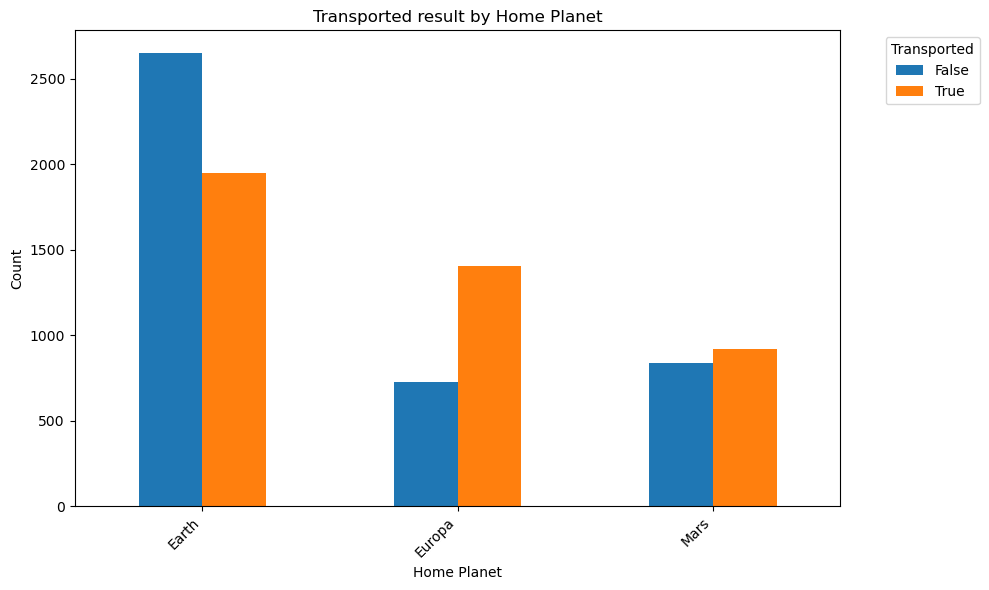

In [9]:
grouped = train.groupby(['HomePlanet', 'Transported']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Transported result by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Print count of transported and not transported individuals by home planet
print("Count of transported and not transported individuals by home planet:")
print(grouped)
plt.show()

Count of transported and not transported individuals by home planet and age group:
Transported    False  True
Destination               
55 Cancri e      702  1098
PSO J318.5-22    395   401
TRAPPIST-1e     3128  2787


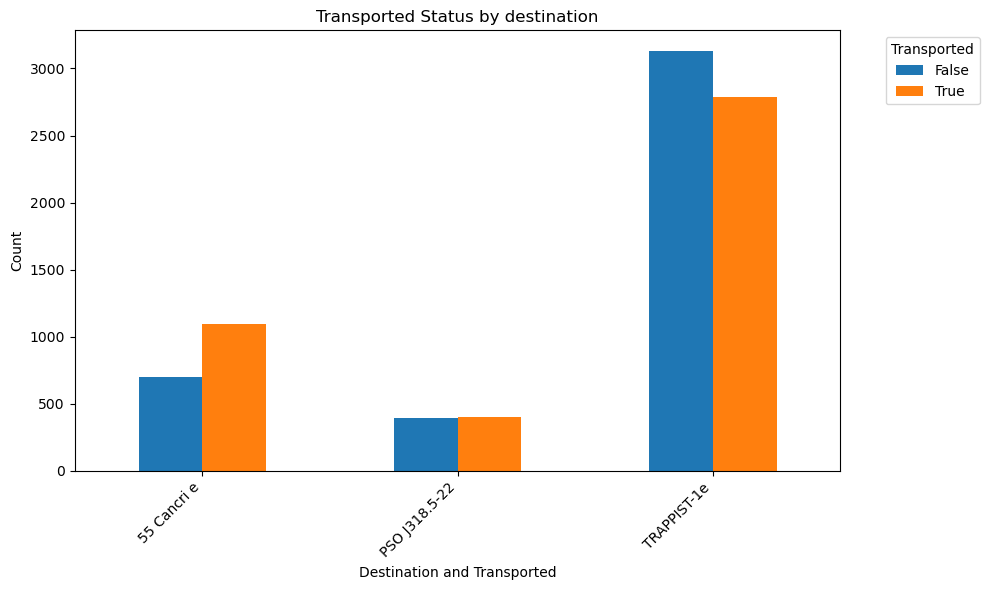

In [11]:
# Group by home_planet and age_group, then count occurrences
grouped = train.groupby(['Destination', 'Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Transported Status by destination')
plt.xlabel('Destination and Transported')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Print count of transported and not transported individuals by home planet and age group
print("Count of transported and not transported individuals by home planet and age group:")
print(grouped)

plt.show()

Count of transported and not transported individuals by home planet and age group:
Transported               False  True
HomePlanet Destination               
Earth      55 Cancri e      342   348
           PSO J318.5-22    357   355
           TRAPPIST-1e     1894  1207
Europa     55 Cancri e      275   611
           PSO J318.5-22      5    14
           TRAPPIST-1e      434   755
Mars       55 Cancri e       75   118
           PSO J318.5-22     27    22
           TRAPPIST-1e      720   755


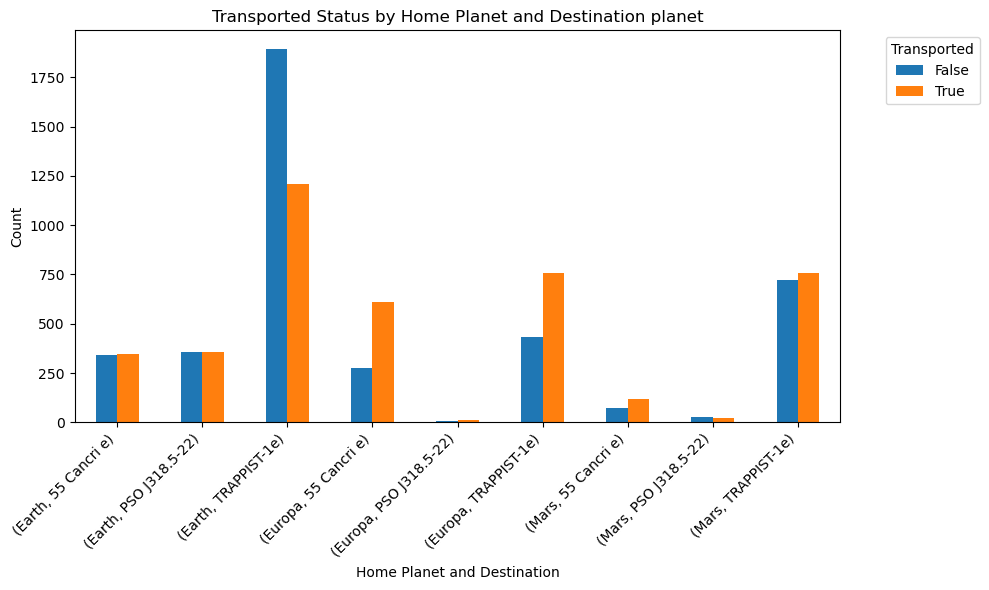

In [12]:
grouped = train.groupby(['HomePlanet','Destination', 'Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  figsize=(10, 6))
plt.title('Transported Status by Home Planet and Destination planet')
plt.xlabel('Home Planet and Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Print count of transported and not transported individuals by home planet and age group
print("Count of transported and not transported individuals by home planet and age group:")
print(grouped)

plt.show()

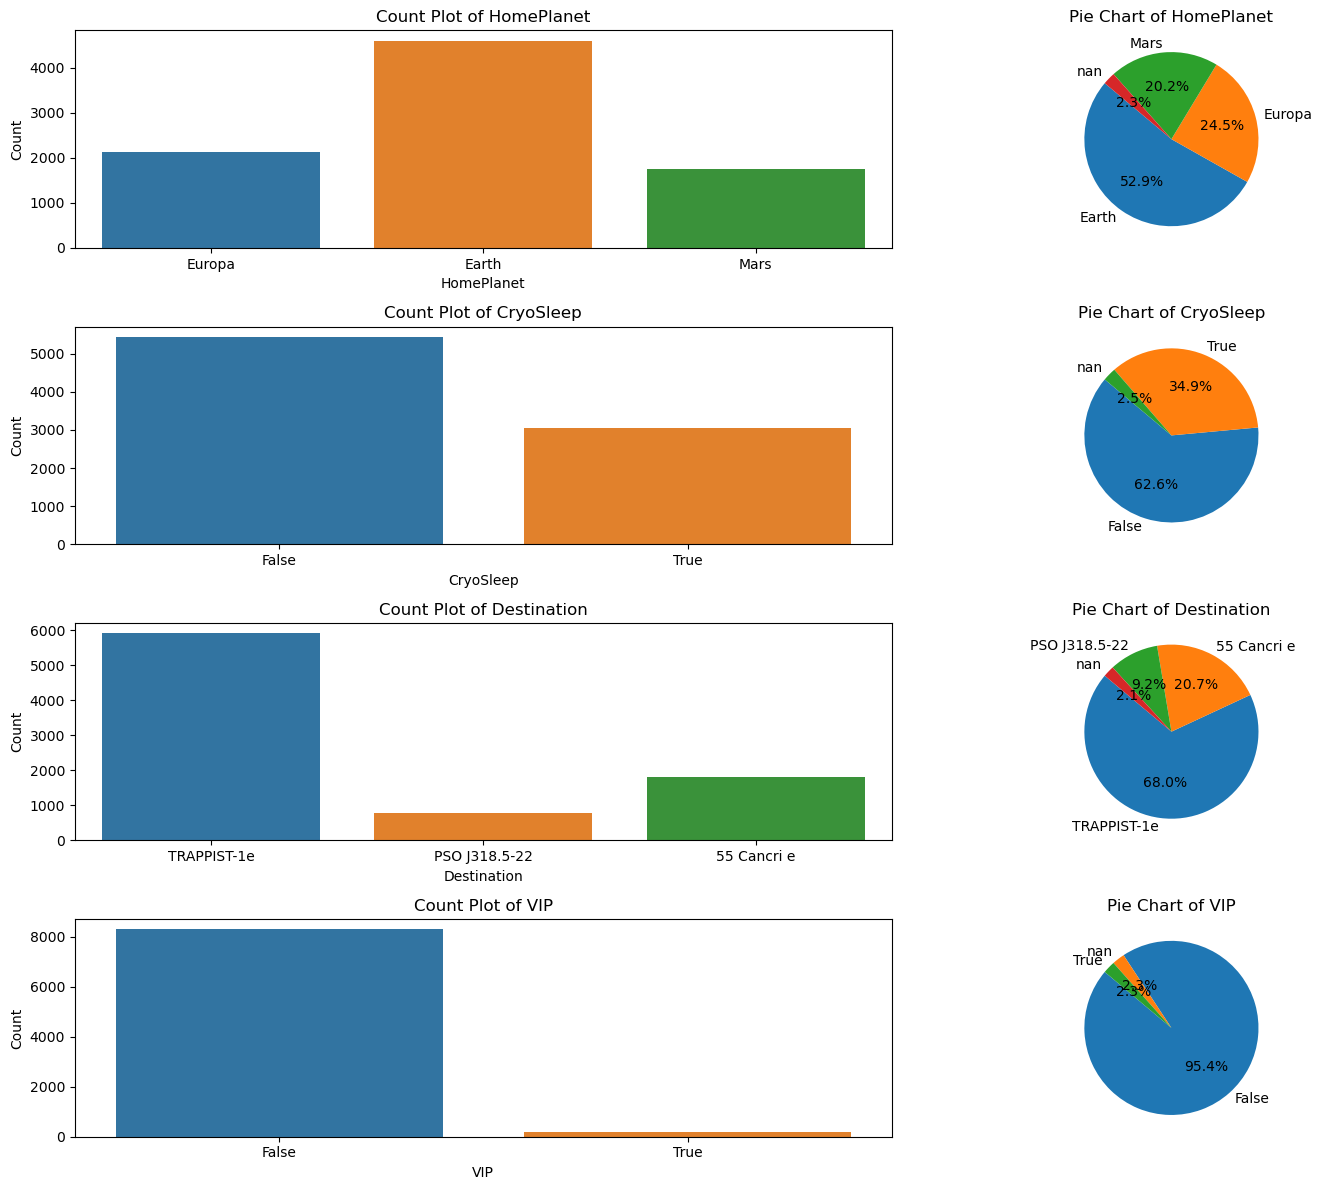

In [10]:
# Categorical columns to plot
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
colors = sns.color_palette("Set2")
# Create subplots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(16, 12))

for i, col in enumerate(categorical_columns):
    value_counts = train[col].value_counts(dropna=False)
    # Bar Plot
    sns.countplot(x=col, data=train, ax=axes[i, 0])
    axes[i, 0].set_title(f'Count Plot of {col}')
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_xlabel(col)
    # Pie Chart
    axes[i, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i, 1].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

In [11]:
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)
train['GroupSize'] = train['PassengerId'].apply(lambda x: int(x.split('_')[1]))
train['TotalSpending'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


test[['Deck', 'CabinNum', 'Side']] = test['Cabin'].str.split('/', expand=True)
test['GroupSize'] = test['PassengerId'].apply(lambda x: int(x.split('_')[1]))
test['TotalSpending'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

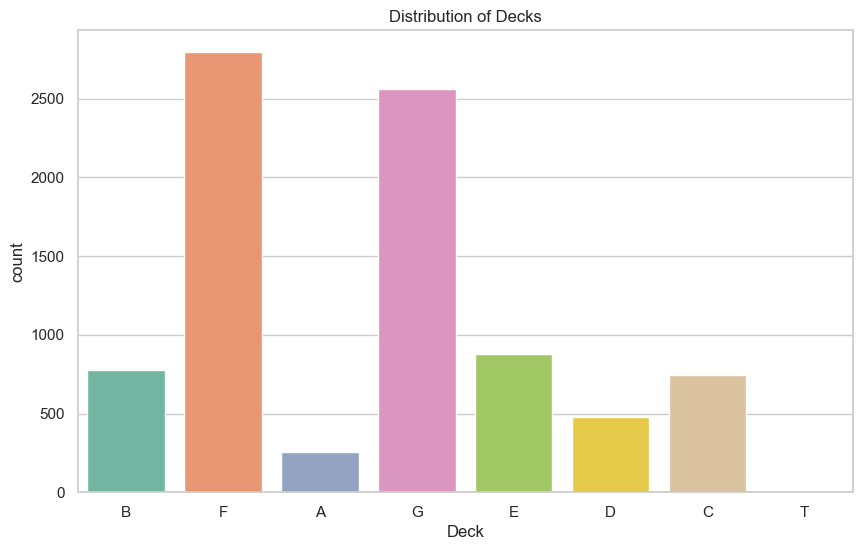

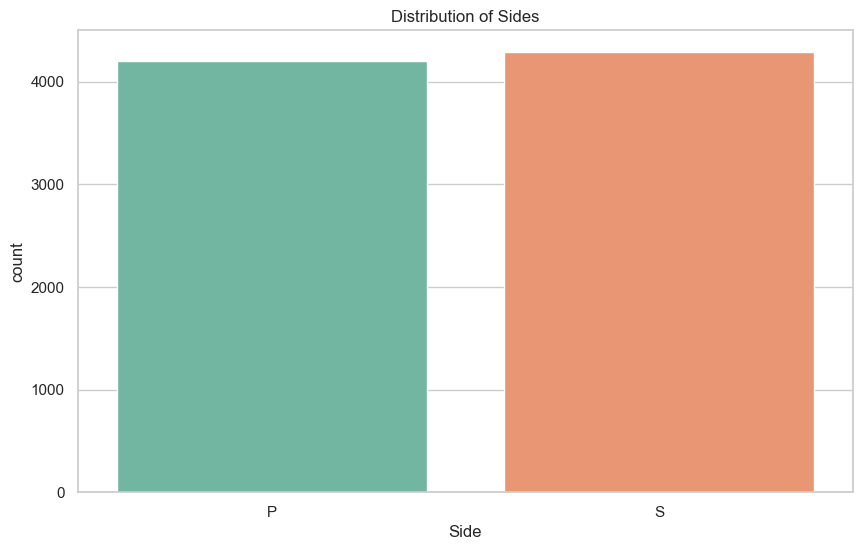

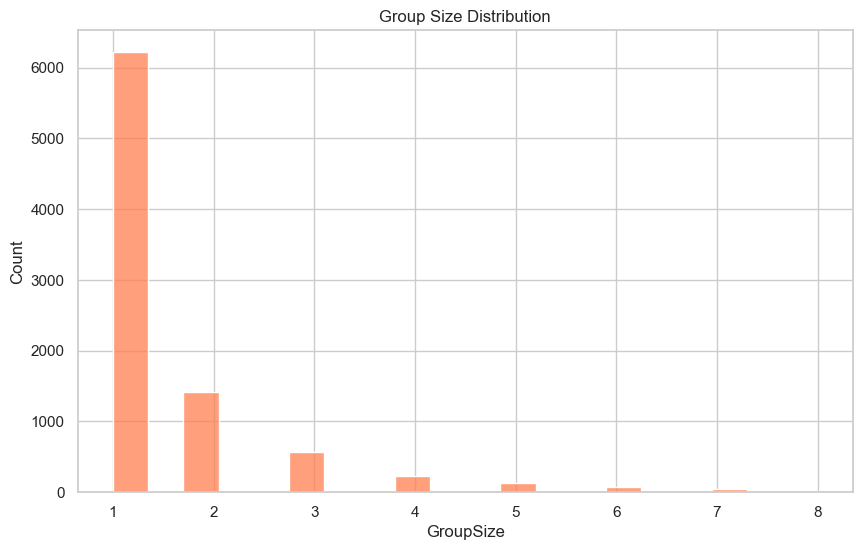

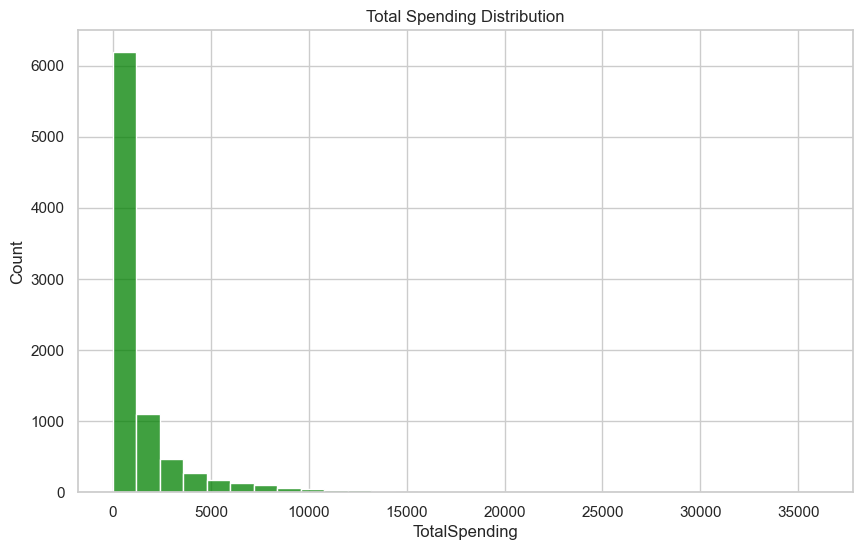

In [12]:
sns.set(style="whitegrid")

# Distribution of Decks
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', data=train, palette='Set2')
plt.title('Distribution of Decks')
plt.show()

# Distribution of Sides
plt.figure(figsize=(10, 6))
sns.countplot(x='Side', data=train, palette='Set2')
plt.title('Distribution of Sides')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train['GroupSize'], bins=20, kde=False, color='coral')
plt.title('Group Size Distribution')
plt.show()

# Total Spending Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['TotalSpending'], bins=30, kde=False, color='green')
plt.title('Total Spending Distribution')
plt.show()

<AxesSubplot:>

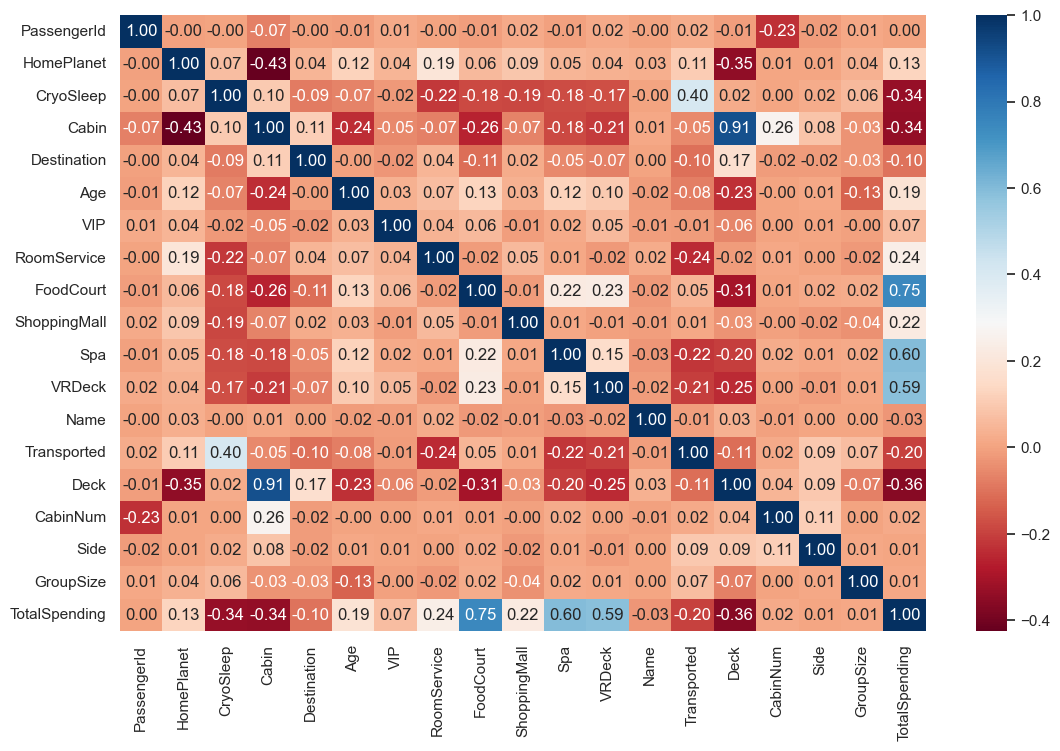

In [13]:
from sklearn.preprocessing import LabelEncoder

obj_col = train.select_dtypes(include='object').columns.tolist()

corr_new_df = train.copy()

le = { col: LabelEncoder() for col in obj_col}
for col in obj_col:
    corr_new_df[col] = le[col].fit_transform(corr_new_df[col])

plt.figure(figsize=(13,8))
corr = corr_new_df.corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu')

### Data preprocessing

In [14]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['number']).columns

In [15]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
train[numerical_cols] = num_imputer.fit_transform(train[numerical_cols])

In [16]:
cat_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])

In [17]:
test[numerical_cols] = num_imputer.transform(test[numerical_cols])
test[categorical_cols] = cat_imputer.fit_transform(test[categorical_cols])

In [18]:
X = train.drop(columns=['Transported', 'Name', 'PassengerId','Cabin'])
y = train['Transported']

In [19]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,GroupSize,TotalSpending
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,1.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S,1.0,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S,1.0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S,2.0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P,1.0,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S,1.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S,1.0,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S,1.0,4637.0


In [20]:
X['CryoSleep'] = X['CryoSleep'].map({True : 1 , False : 0})
X['VIP'] = X['VIP'].map({True : 1 , False : 0})
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,GroupSize,TotalSpending
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P,1.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,S,1.0,736.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S,1.0,10383.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,S,2.0,5176.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,F,1,S,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,A,98,P,1.0,8536.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,G,1499,S,1.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,G,1500,S,1.0,1873.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,E,608,S,1.0,4637.0


In [21]:
from sklearn.preprocessing import LabelEncoder

obj_col = X.select_dtypes(include='object').columns.tolist()

le = { col: LabelEncoder() for col in obj_col}
for col in obj_col:
    X[col] = le[col].fit_transform(X[col])

In [22]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,GroupSize,TotalSpending
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1.0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1,1.0,736.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,1.0,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,2.0,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1795,0,1.0,8536.0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,548,1,1.0,0.0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,551,1,1.0,1873.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1385,1,1.0,4637.0


In [23]:
test['CryoSleep'] = test['CryoSleep'].map({True : 1 , False : 0})
test['VIP'] = test['VIP'].map({True : 1 , False : 0})

obj_col = test.select_dtypes(include='object').columns.tolist()

le = { col: LabelEncoder() for col in obj_col}
for col in obj_col:
    test[col] = le[col].fit_transform(test[col])

In [24]:
test_y= test.drop(columns=['Name', 'PassengerId','Cabin'])
test_y

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,GroupSize,TotalSpending
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,820,1,1.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,927,1,1.0,2832.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1,1.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,1.0,7418.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1029,1,1.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,6,452,1,2.0,0.0
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,5,927,1,1.0,1018.0
4274,2,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,3,816,0,1.0,0.0
4275,1,0,2,27.0,0,0.0,2680.0,0.0,0.0,523.0,3,817,0,1.0,3203.0


In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
# Select the 10 best features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the column names of the selected features
selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)
print("Transformed dataset shape:", X_new.shape)

Selected features: Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService', 'Spa',
       'VRDeck', 'Deck', 'Side', 'TotalSpending'],
      dtype='object')
Transformed dataset shape: (8693, 10)


In [26]:
X = X[selected_features]

In [27]:
test_y = test_y[selected_features]

In [28]:
y = y.map({True : 1 , False : 0})

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model trainig

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the base models
rf = RandomForestClassifier(random_state=42)
nb = GaussianNB()
svm = SVC(probability=True, random_state=42)
lr = LogisticRegression(max_iter=200, random_state=42)

# Hyperparameter tuning for each model
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_lr = {'C': [0.1, 1, 10]}

# Grid search for Random Forest
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print('Best parameters for Random Forest:',best_rf)

# Grid search for SVM
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print('Best parameters for SVM:',best_svm)

# Grid search for Logistic Regression
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
print('Best parameters for Logistic Regression:',best_lr)

Best parameters for Random Forest: RandomForestClassifier(max_depth=10, random_state=42)
Best parameters for SVM: SVC(C=0.1, kernel='linear', probability=True, random_state=42)
Best parameters for Logistic Regression: LogisticRegression(C=0.1, max_iter=200, random_state=42)


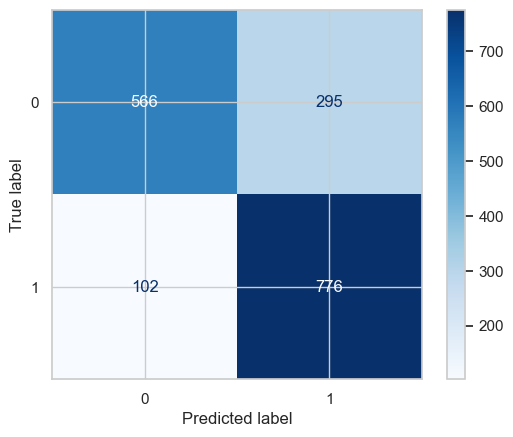

In [31]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('nb', nb),
        ('svm', best_svm),
        ('lr', best_lr)
    ],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_val)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show plot
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       861
           1       0.72      0.88      0.80       878

    accuracy                           0.77      1739
   macro avg       0.79      0.77      0.77      1739
weighted avg       0.79      0.77      0.77      1739



### Explainable AI

In [33]:
import lime
import lime.lime_tabular
# LIME explanations
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='classification', feature_names=X.columns)

# Explain predictions of the voting classifier (use the first instance in X_val)
instance_idx = 0
exp = explainer.explain_instance(X_val.iloc[instance_idx].values, voting_clf.predict_proba, num_features=len(X.columns))

# Show explanation
exp.show_in_notebook(show_table=True)

In [34]:
y_pred = voting_clf.predict(test_y)

In [35]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Test Set prediction

In [36]:
test = pd.read_csv(url)
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': y_pred
})
submission['Transported'] = submission['Transported'].map({1: True, 0: False})
submission.to_csv('submission.csv', index=False)